<a href="https://colab.research.google.com/github/hyp3r5pace/Machine-learning-lab/blob/main/Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1**

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
# load the iris dataset
iris = datasets.load_iris()

# loading the feature sample dataset into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df_class = pd.DataFrame(iris.target, columns=['class'])
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
# create a linearly separable dataset by using only two features
df = df.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)
df = df.iloc[50:] # removing the datapoints corresponding to setosa class
df_class = df_class.iloc[50:] # removing the class values corresponding to setosa class

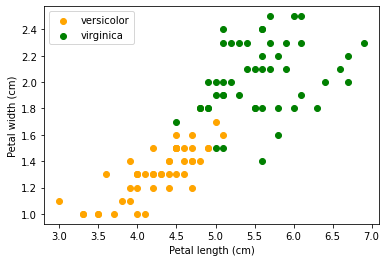

In [ ]:
# plotting the linearly separable dataset for visualisation
colr = {1:'versicolor', 2:'virginica'}

plt.scatter(df['petal length (cm)'].iloc[0:49], df['petal width (cm)'].iloc[0:49], c = 'orange', label=colr[1])
plt.scatter(df['petal length (cm)'].iloc[50:99], df['petal width (cm)'].iloc[50:99], c = 'green', label=colr[2])
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.show()

In [ ]:
# performing classification using svm
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn import metrics

# joining class labels to the datapoints as a new feature
df['class'] = df_class['class']
# creating the folds for 5-fold cross validation
kf = KFold(n_splits=5,shuffle=True)

# 5-fold cross validation, training and testing of the model
# considering one by one each of the fold as test set and remaining as train set
# evaluating the accuracy in each iteration and finally computing the average of them
accuracy, class_wise_accuracy = [], [[],[]]
for train_index,test_index in kf.split(df):
  train_data = df.iloc[train_index]
  # defining the SVM model with kernel as radial basis function
  classifier = svm.SVC(kernel='rbf')
  # training the SVM model
  classifier.fit(train_data[['petal length (cm)','petal width (cm)']], train_data['class'])
  test_data = df.iloc[test_index]
  # computing the predicted value by the trained model on test set
  pred = classifier.predict(test_data[['petal length (cm)', 'petal width (cm)']])
  accuracy.append(metrics.accuracy_score(test_data['class'], pred))
  temp = test_data['class'].values.tolist()
  count1, total1, count2, total2 = 0,0,0,0
  for i in range(len(pred)):
    if (pred[i] == 1):
      total1 += 1
      if (temp[i] == 1): count1 += 1
    else:
      total2 += 1
      if (temp[i] == 2): count2 += 1
  class_wise_accuracy[0].append(count1/total1)
  class_wise_accuracy[1].append(count2/total2)

# computing the average accuracy
print('Final average accuracy of the SVM classifier: %f' %(sum(accuracy)/len(accuracy)))
print('Final average accuracy of the SVM for class versicolour: %f' %(sum(class_wise_accuracy[0])/len(class_wise_accuracy[0])))
print('Final average accuracy of the SVM for class virginica: %f' %(sum(class_wise_accuracy[1])/len(class_wise_accuracy[1])))

Final average accuracy of the SVM classifier: 0.950000
Final average accuracy of the SVM for class versicolour: 0.949231
Final average accuracy of the SVM for class virginica: 0.951429


# **Question 2**

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
# load the iris dataset
iris = datasets.load_iris()

# loading the feature sample dataset into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df_class = pd.DataFrame(iris.target, columns=['class'])
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
# splitting in test and train dataset
# 80% of the dataset for training and 20% for testing
index = random.sample([i for i in range(150)], int(8 * 15))
train_set = df.loc[index]
train_class_set = df_class.loc[index]
test_set = df.loc[set([i for i in range(150)]) - set(index)]
test_class_set = df_class.loc[set([i for i in range(150)]) - set(index)]

In [ ]:
# radial basis function

class radialBasisFunction:
  def __init__(self,clusterCenters, betaValues, weights, learningRate):
    self.clusterCenters = clusterCenters
    self.betaValues = betaValues
    self.weights = weights
    self.transformedValues = [0 for i in range(len(clusterCenters))]
    self.classValue = [0, 0, 0]
    self.learningRate = learningRate
    self.gradientValues = [[0 for i in range(len(self.clusterCenters) + 1)] for j in range(3)]

  def euclideanDistance(self, point_a, point_b):
    sum = 0
    for i in range(len(point_a)):
      sum += (point_a[i] - point_b[i]) ** 2
    return (math.sqrt(sum))
  
  def gaussianKernel(self, clusterCenter, dataValue, betaValue):
    return (math.exp(-betaValue * (self.euclideanDistance(clusterCenter, dataValue) ** 2)))
  
  def higherDimensionTransform(self, dataValue):
    for i in range(len(self.transformedValues)):
      self.transformedValues[i] = self.gaussianKernel(clusterCenters[i], dataValue, self.betaValues[i])
  
  def activationFunction(self, sum):
    return (1 / (1 + math.exp(-1 * sum)))   # sigmoid function
  
  def getOutputNodeVal(self):
    for i in range(len(self.classValue)):
      sum = 0
      for j in range(len(self.transformedValues)):
        sum += self.transformedValues[j] * self.weights[i][j]
      sum += self.weights[i][-1]
      self.classValue[i] = self.activationFunction(sum)
  
  def training(self, trainSet, trainClassSet):
    iterations = 0
    while (iterations <= 10000):
      self.gradientValues = [[0 for i in range(len(self.clusterCenters) + 1)] for j in range(3)]
      # forward pass
      # transformation to higher dimension datapoints
      for i in range(len(trainSet)):
        self.higherDimensionTransform(trainSet[i])
      
        # evaluating the class value
        self.getOutputNodeVal()

        # backpropagation
        # calculating gradients
        for j in range(len(self.classValue)):
          val = 1 if (trainClassSet[i] == j) else 0
          for k in range(len(self.gradientValues[j]) - 1):
            self.gradientValues[j][k] += (self.classValue[j] - val) * self.transformedValues[k]
          self.gradientValues[j][-1] += (self.classValue[j] - val)
        
        # updating weights
        for j in range(len(self.weights)):
          for k in range(len(self.weights[j])):
            self.weights[j][k] -= (self.learningRate / len(trainSet)) * self.gradientValues[j][k]
        
      iterations += 1

  # function to evaluate the performance of the RBFN
  def evaluation(self, testSet, testClassSet):
    numOfMisclassification = 0
    for i in range(len(testSet)):
      self.higherDimensionTransform(testSet[i])
      self.getOutputNodeVal()

      index,val = 0, self.classValue[0]
      for j in range(1,3):
        if (val < self.classValue[j]):
          index = j
          val = self.classValue[j]
      
      if (index != testClassSet[i]):
          numOfMisclassification += 1
    
    return (1.0 - (numOfMisclassification / len(testSet)))

  # function to calculate classwise evaluation metrics
  def classWiseEvaluation(self, testSet, testClassSet):
    numOfMisclassification = [0 for i in range(len(self.classValue))]
    count = [0 for i in range(len(self.classValue))]
    accuracy = [0 for i in range(len(self.classValue))]
    for i in range(len(testSet)):
      self.higherDimensionTransform(testSet[i])
      self.getOutputNodeVal()

      index,val = 0, self.classValue[0]
      for j in range(1,3):
        if (val < self.classValue[j]):
          index = j
          val = self.classValue[j]
      
      if (index != testClassSet[i]):
          numOfMisclassification[testClassSet[i]] += 1
      
      count[testClassSet[i]] += 1

      for j in range(len(self.classValue)):
        if (count[j] != 0):
          accuracy[j] = (1.0 - (numOfMisclassification[j] / count[j]))
        else:
          accuracy[j] = -1
    
    return accuracy



In [ ]:
training_accuracy, testing_accuracy = 0,0
# cluster center values copied from previous assignment
# considering number of clusters = 7
clusterCenters = [[6.229729729729731, 2.8513513513513513, 4.767567567567568, 1.5729729729729722], [5.4, 3.8923076923076922, 1.5076923076923079, 0.2692307692307693], [5.529629629629629, 2.6222222222222222, 3.940740740740741, 1.2185185185185188], [6.529166666666666, 3.0583333333333336, 5.508333333333333, 2.1624999999999996], [5.040000000000001, 3.4499999999999993, 1.4749999999999999, 0.27], [7.475000000000001, 3.125, 6.3, 2.0500000000000003], [4.664705882352941, 3.047058823529412, 1.4117647058823528, 0.20000000000000004]]
betaValues = [0.5 for i in range(len(clusterCenters))]
weights = [[0 for i in range(len(clusterCenters) + 1)] for j in range(3)]
className = {0:'Setosa', 1: 'Versicolor', 2: 'Virginica'}

# creating a instance of the RBFNN
RBFNN = radialBasisFunction(clusterCenters, betaValues, weights, 0.03)

# training the RBFNN
RBFNN.training(train_set.values.tolist(), [x for i in train_class_set.values.tolist() for x in i])
training_accuracy = RBFNN.evaluation(train_set.values.tolist(), [x for i in train_class_set.values.tolist() for x in i])
trainingClassWiseAccuracy = RBFNN.classWiseEvaluation(train_set.values.tolist(), [x for i in train_class_set.values.tolist() for x in i])
print('Class wise training accuracy:')
for i in range(3):
  print('Training accuracy for class %s: %f' %(className[i], trainingClassWiseAccuracy[i] * 100.0))
print('\n\n')
# testing the RBFNN
testing_accuracy = RBFNN.evaluation(test_set.values.tolist(), [x for i in test_class_set.values.tolist() for x in i])
testingClassWiseAccuracy = RBFNN.classWiseEvaluation(test_set.values.tolist(), [x for i in test_class_set.values.tolist() for x in i])
print('Class wise testing accuracy:')
for i in range(3):
  print('Testing accuracy for class %s: %f' %(className[i], testingClassWiseAccuracy[i] * 100.0))
print('\n\n')
print('Overall Training Set accuracy: %f' %(training_accuracy * 100.0))
print('Overall Test set accuracy %f' %(testing_accuracy * 100.0))


Class wise training accuracy:
Training accuracy for class Setosa: 100.000000
Training accuracy for class Versicolor: 97.777778
Training accuracy for class Virginica: 85.714286



Class wise testing accuracy:
Testing accuracy for class Setosa: 100.000000
Testing accuracy for class Versicolor: 80.000000
Testing accuracy for class Virginica: 93.333333



Overall Training Set accuracy: 95.000000
Overall Test set accuracy 93.333333
